IT9002 - Natural Language Processing Project<br>
By Israa Tageldin - 12010745


---
![Alt text for accessibility](https://github.com/israa-tageldin/NLP-Project/blob/main/banner.png?raw=true)



</br>




# **Task 1 - Problem Statement Formulation and Definition**

---

### This project examines whether Amazon **star ratings (1–5)** are aligned with the sentiment expressed in the written **review text**. First, reviews are classified into **Positive**, **Neutral**, or **Negative** sentiment using a **text-based sentiment approach**. In parallel, star ratings are converted into sentiment groups (**1–2 = Negative, 3 = Neutral, 4–5 = Positive**) and used to train **rating-based sentiment models**. The study then compares **text-based sentiment** with **rating-based sentiment (stars and ML predictions)** to measure alignment and disagreement. Finally, it explores whether combining both signals (rating + text sentiment) can provide better customer insight and support more reliable recommendations.


# **Task 2 - Selection of an Appropriate Data Set (Data Collection)**

---
### Dataset Source and Justification
This project uses an **Amazon Health & Personal Care reviews** dataset from the **Amazon Reviews 2023** collection:  
https://amazon-reviews-2023.github.io/#

The original dataset contained **494,121 reviews**  from February 2001 to September 2023. </br>
To keep the analysis recent and reduce processing time in Google Colab, I retained only the **2023** reviews and stored them in **my project GitHub repository**.

## Load Dataset and Initial Inspection of Dataset Structure, Shape and Overview
The selected Amazon Health & Personal Care review dataset was loaded from GitHub into Google Colab using Pandas. An initial inspection was performed to understand the dataset structure, size, and data types.


In [1]:
import pandas as pd
#Load dataset from my GitHub repository into datafram
file_path = 'https://raw.githubusercontent.com/israa-tageldin/NLP-Project/refs/heads/main/Amazon_Reviews_Health.jsonl'
df = pd.read_json(file_path, lines=True)

print(f"Successfully loaded {len(df)} reviews.")
df.head()

Successfully loaded 11477 reviews.


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Works,I use these for my car windows when they fog u...,[],B09JYKTSKR,B09T5H2VKP,AHHFW36BP4VMQWC6V2NTKIXFAA2A,2023-01-17 17:28:21.955,0,True
1,3,One of my go to brushes,This double sided brush is decent for dogs- my...,[{'small_image_url': 'https://m.media-amazon.c...,B08B7238H5,B0963Y93GG,AFV22L7AEKI2LW6HMLRLUKNYVBGQ,2023-02-15 18:59:45.339,0,True
2,3,It's only soluble fiber,I bought this hoping to increase my fiber inta...,[],B07577L1H8,B07577L1H8,AFTIM4OKTMFNKK4BRL4GNDHMPFSA,2023-02-17 20:14:54.147,0,True
3,5,As expected,As advertised,[],B007QESMDK,B007QESMDK,AE25NQAZI3725GZIL5FS52ZIKWKQ,2023-01-17 03:19:50.103,0,True
4,5,I love this mask! Very well crafted!,I have been wanting to buy a Henry mask for a ...,[],B08TY6PZJN,B08ZCLW41P,AFKFGAKYW7CSKWQNZE4CIPW66TJQ,2023-01-26 20:33:24.104,0,True


In [2]:
df.shape

(11477, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             11477 non-null  int64         
 1   title              11477 non-null  object        
 2   text               11477 non-null  object        
 3   images             11477 non-null  object        
 4   asin               11477 non-null  object        
 5   parent_asin        11477 non-null  object        
 6   user_id            11477 non-null  object        
 7   timestamp          11477 non-null  datetime64[ns]
 8   helpful_vote       11477 non-null  int64         
 9   verified_purchase  11477 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 818.3+ KB


In [4]:
df.describe()

,rating,timestamp,helpful_vote
count,11477.000000,11477,11477.000000
mean,3.847434,2023-03-13 13:05:16.322029312,0.440795
min,1.000000,2022-12-31 21:13:10.032000,0.000000
25%,3.000000,2023-01-30 16:23:39.623000064,0.000000
50%,5.000000,2023-03-03 23:46:42.276000,0.000000
75%,5.000000,2023-04-07 21:03:54.273999872,0.000000
max,5.000000,2023-09-11 05:03:12.467000,87.000000
std,1.584163,NaN,1.995006


**Distribution of Star Ratings - Dataset Label**

In this step, the distribution of star ratings is plotted to check how reviews are spread across the five rating classes and to observe any imbalance in the dataset.


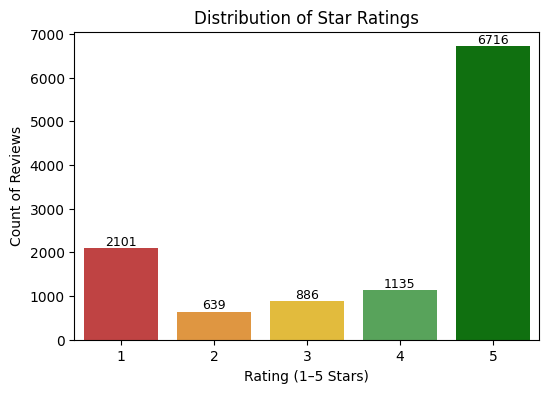

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
custom_energy_palette = ["#D32F2F","#F99827", "#FEC921", "#4CAF50", "#008000"  ]

ax = sns.countplot(data=df, x='rating', hue='rating', palette=custom_energy_palette, legend=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Distribution of Star Ratings")
plt.xlabel("Rating (1–5 Stars)")
plt.ylabel("Count of Reviews")
plt.show()

# **Task 3 - Text Preprocessing**

---
Text preprocessing is a critical stage in Natural Language Processing because models are sensitive to noise such as punctuation, duplicated records, inconsistent casing, and irrelevant columns. In this task, the dataset is cleaned and prepared for NLP modeling by removing unused columns and duplicates, then applying key preprocessing techniques including **tokenization**, **lemmatization**, and **TF-IDF** feature extraction. Intermediate outputs are shown to demonstrate the impact of each step.


In [6]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Cleaning
The dataset was cleaned by removing duplicate records, dropping unused columns, removing empty reviews, combining the review title and text fields, converting all text to lowercase, and removing noise such as HTML tags, URLs, punctuation, and special characters.


In [7]:
import numpy as np
import re

# Remove HTML line breaks, URLs, HTML tags,extra spaces, and keep only letters. Then remove stopwords.
def clean_text(text):
    text = str(text)
    text = re.sub(r"<br\s*/?>", " ", text, flags=re.IGNORECASE)
    text = re.sub(r"http\S+|www\S+", "", text)      # remove URLs
    text = re.sub(r"<.*?>", " ", text)              # remove any remaining HTML tags
    text = re.sub(r"[^a-z\s]", " ", text)          # keep letters only
    text = re.sub(r"\s+", " ", text).strip()       # remove extra spaces

    # remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    text = " ".join(words)

    return text


print("Initial shape:", df.shape)

# Keep only useful columns
keep_cols = ["rating", "title", "text", "timestamp", "helpful_vote", "verified_purchase"]
df_cleaned = df[keep_cols].copy()
print("After keeping useful columns:", df_cleaned.shape)

# Remove duplicates review where title and text are the same
df_cleaned.drop_duplicates(subset=["title", "text"], inplace=True)
after = df_cleaned.shape[0]
print("After duplicates removed:", df_cleaned.shape)

# Remove empty text rows and combine title with text
df_cleaned = df_cleaned[df_cleaned["text"].notna()]
df_cleaned = df_cleaned[df_cleaned["text"].str.strip() != ""]
df_cleaned["reviews"] = (df_cleaned["title"].fillna("").str.strip()  + ". " + df_cleaned["text"].str.strip()).str.strip()

# Make the reviews in lowercase
df_cleaned["reviews"] = df_cleaned["reviews"].str.lower()

# Remove HTML tags, URLs and StopWords
df_cleaned["reviews"]= df_cleaned["reviews"].apply(clean_text)

#remove empty reviews
df_cleaned = df_cleaned[df_cleaned["reviews"].str.len() > 0].copy()
print("Final shape after cleaning:", df_cleaned.shape)

df_cleaned.head()

Initial shape: (11477, 10)
After keeping useful columns: (11477, 6)
After duplicates removed: (11238, 6)
Final shape after cleaning: (11207, 7)


,rating,title,text,timestamp,helpful_vote,verified_purchase,reviews
0,5,Works,I use these for my car windows when they fog u...,2023-01-17 17:28:21.955,0,True,works use car windows fog work glasses well
1,3,One of my go to brushes,This double sided brush is decent for dogs- my...,2023-02-15 18:59:45.339,0,True,one go brushes double sided brush decent dogs ...
2,3,It's only soluble fiber,I bought this hoping to increase my fiber inta...,2023-02-17 20:14:54.147,0,True,soluble fiber bought hoping increase fiber int...
3,5,As expected,As advertised,2023-01-17 03:19:50.103,0,True,expected advertised
4,5,I love this mask! Very well crafted!,I have been wanting to buy a Henry mask for a ...,2023-01-26 20:33:24.104,0,True,love mask well crafted wanting buy henry mask ...


In [8]:
df = df_cleaned.copy()

## 1. Tokenization
Tokenization splits each review into individual word tokens to allow word-level processing.


In [9]:
df["tokens"] = df["reviews"].apply(word_tokenize)

# Show tokenization sample output
display(df[["reviews", "tokens"]].head(3))


,reviews,tokens
0,works use car windows fog work glasses well,"[works, use, car, windows, fog, work, glasses,..."
1,one go brushes double sided brush decent dogs ...,"[one, go, brushes, double, sided, brush, decen..."
2,soluble fiber bought hoping increase fiber int...,"[soluble, fiber, bought, hoping, increase, fib..."


## 2.  Lemmatization
Lemmatization converts tokens into their base dictionary form to reduce word variation and improve feature consistency.


In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df["tokens_lemma"] = df["tokens"].apply(lemmatize_tokens)
# Convert back to text (needed for TF-IDF input)
df["review_lemmatized"] = df["tokens_lemma"].apply(lambda x: " ".join(x))
# Show lemmatization sample output
display(df[["reviews", "review_lemmatized"]].head(3))

,reviews,review_lemmatized
0,works use car windows fog work glasses well,work use car window fog work glass well
1,one go brushes double sided brush decent dogs ...,one go brush double sided brush decent dog iss...
2,soluble fiber bought hoping increase fiber int...,soluble fiber bought hoping increase fiber int...


## 3. TF-IDF Feature Extraction
TF-IDF converts lemmatized review text into numerical vectors for machine learning.




In [11]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")
X_tfidf = tfidf.fit_transform(df["review_lemmatized"])

print("TF-IDF matrix shape:", X_tfidf.shape)

feature_names = tfidf.get_feature_names_out()
print("Sample TF-IDF features:", feature_names[:100])

TF-IDF matrix shape: (11207, 5000)
Sample TF-IDF features: ['aa' 'ab' 'ability' 'able' 'able use' 'abrasive' 'absolute'
 'absolute best' 'absolutely' 'absolutely amazing' 'absolutely love'
 'absolutely loved' 'absorb' 'absorbed' 'absorbent' 'absorbs' 'absorption'
 'ac' 'accept' 'acceptable' 'access' 'accessory' 'accident' 'accidentally'
 'according' 'accurate' 'ache' 'ache pain' 'achieve' 'aching' 'acid'
 'acid reflux' 'acne' 'act' 'acting' 'action' 'active' 'activity' 'actual'
 'actually' 'actually pretty' 'actually work' 'acv' 'ad' 'adapter' 'add'
 'added' 'adding' 'addition' 'additional' 'additionally' 'additive'
 'address' 'adequate' 'adhere' 'adhesion' 'adhesive' 'adjust' 'adjustable'
 'adjusted' 'adjustment' 'admit' 'adorable' 'adult' 'advanced'
 'advertised' 'advertisement' 'advertising' 'advise' 'advised' 'ae' 'af'
 'affect' 'afford' 'affordable' 'afraid' 'afternoon' 'aftertaste' 'age'
 'aggressive' 'ago' 'agree' 'agrestis' 'ahead' 'aid' 'aid kit' 'air'
 'air freshener' 'air pu

**Top TF-IDF Terms Plot**

A plot of the top TF-IDF terms was generated to visualize the most influential words/phrases in the dataset based on overall TF-IDF weight.

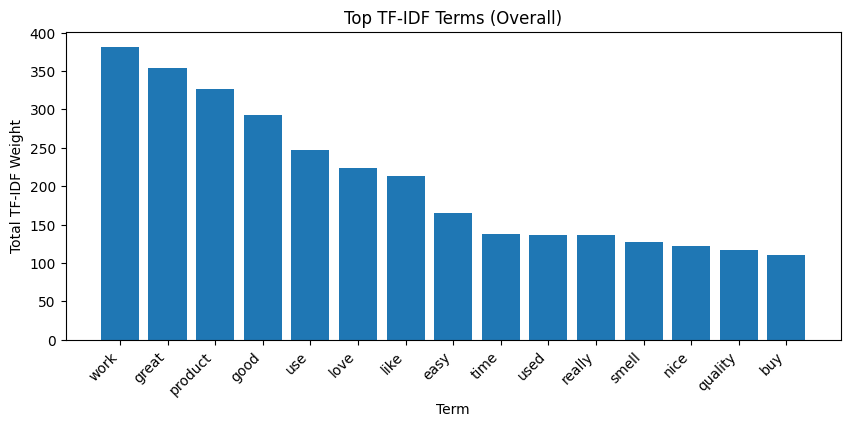

In [12]:
tfidf_sum = np.asarray(X_tfidf.sum(axis=0)).ravel()
top_idx = tfidf_sum.argsort()[-15:][::-1]

top_terms = feature_names[top_idx]
top_scores = tfidf_sum[top_idx]

plt.figure(figsize=(10,4))
plt.bar(top_terms, top_scores)
plt.title("Top TF-IDF Terms (Overall)")
plt.xlabel("Term")
plt.ylabel("Total TF-IDF Weight")
plt.xticks(rotation=45, ha="right")
plt.show()


# **Task 4 - Text Representation**
---
After preprocessing, the next step is to convert the review text into machine-readable representations that can be used by sentiment classification models. In this task, three complementary text representation techniques are applied to support the analysis of agreement and disagreement between star-rating sentiment and review-text sentiment:
1. **Bag of Words**
2. **N-grams**
3. **POS tagging**


These techniques capture (1) word frequency patterns, (2) short sentiment phrases such as negations and intensifiers, and (3) grammatical structures that often convey opinion strength and contrast.


In [14]:
df.head()

,rating,title,text,timestamp,helpful_vote,verified_purchase,reviews,tokens,tokens_lemma,review_lemmatized
0,5,Works,I use these for my car windows when they fog u...,2023-01-17 17:28:21.955,0,True,works use car windows fog work glasses well,"[works, use, car, windows, fog, work, glasses,...","[work, use, car, window, fog, work, glass, well]",work use car window fog work glass well
1,3,One of my go to brushes,This double sided brush is decent for dogs- my...,2023-02-15 18:59:45.339,0,True,one go brushes double sided brush decent dogs ...,"[one, go, brushes, double, sided, brush, decen...","[one, go, brush, double, sided, brush, decent,...",one go brush double sided brush decent dog iss...
2,3,It's only soluble fiber,I bought this hoping to increase my fiber inta...,2023-02-17 20:14:54.147,0,True,soluble fiber bought hoping increase fiber int...,"[soluble, fiber, bought, hoping, increase, fib...","[soluble, fiber, bought, hoping, increase, fib...",soluble fiber bought hoping increase fiber int...
3,5,As expected,As advertised,2023-01-17 03:19:50.103,0,True,expected advertised,"[expected, advertised]","[expected, advertised]",expected advertised
4,5,I love this mask! Very well crafted!,I have been wanting to buy a Henry mask for a ...,2023-01-26 20:33:24.104,0,True,love mask well crafted wanting buy henry mask ...,"[love, mask, well, crafted, wanting, buy, henr...","[love, mask, well, crafted, wanting, buy, henr...",love mask well crafted wanting buy henry mask ...


### **1. Bag of Words (BoW) + Top Words Plot**

BoW matrix shape: (11207, 5000)


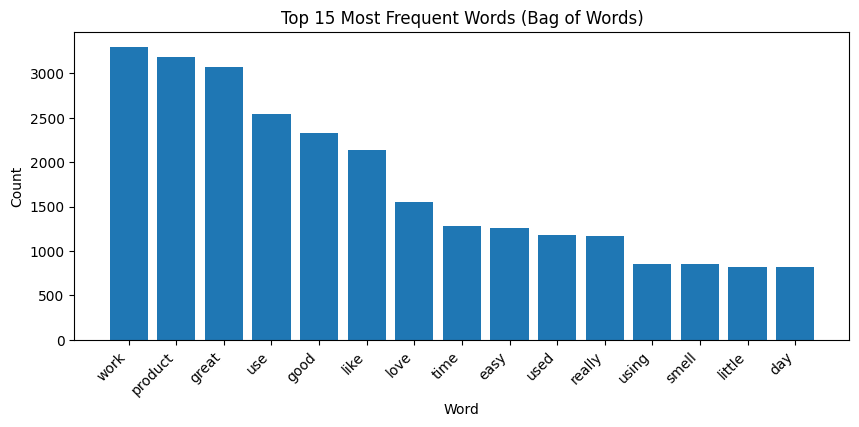

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

bow = CountVectorizer(max_features=5000, stop_words="english")
X_bow = bow.fit_transform(df["review_lemmatized"])

print("BoW matrix shape:", X_bow.shape)

terms = np.array(bow.get_feature_names_out())
counts = np.asarray(X_bow.sum(axis=0)).ravel()

top_idx = counts.argsort()[-15:][::-1]
top_terms = terms[top_idx]
top_counts = counts[top_idx]

plt.figure(figsize=(10,4))
plt.bar(top_terms, top_counts)
plt.title("Top 15 Most Frequent Words (Bag of Words)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


### **2. N-grams (Bigrams) + Top Bigrams Plot**

Bigram matrix shape: (11207, 5000)


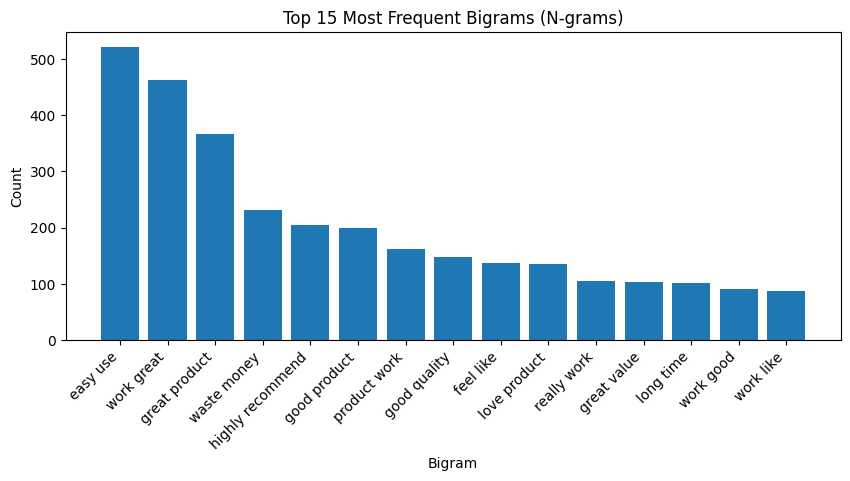

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

bigram_vec = CountVectorizer(stop_words="english", ngram_range=(2,2), max_features=5000)
X_bi = bigram_vec.fit_transform(df["review_lemmatized"])

print("Bigram matrix shape:", X_bi.shape)

bigrams = np.array(bigram_vec.get_feature_names_out())
bi_counts = np.asarray(X_bi.sum(axis=0)).ravel()

top_idx = bi_counts.argsort()[-15:][::-1]
top_bigrams = bigrams[top_idx]
top_bi_counts = bi_counts[top_idx]

plt.figure(figsize=(10,4))
plt.bar(top_bigrams, top_bi_counts)
plt.title("Top 15 Most Frequent Bigrams (N-grams)")
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


In [17]:
import nltk
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

### **3. POS Tagging + Sample + POS Distribution Plot**

Sample tokens: ['work', 'use', 'car', 'window', 'fog', 'work', 'glass', 'well']
POS tags: [('work', 'NN'), ('use', 'NN'), ('car', 'NN'), ('window', 'NN'), ('fog', 'NN'), ('work', 'NN'), ('glass', 'NN'), ('well', 'RB')]


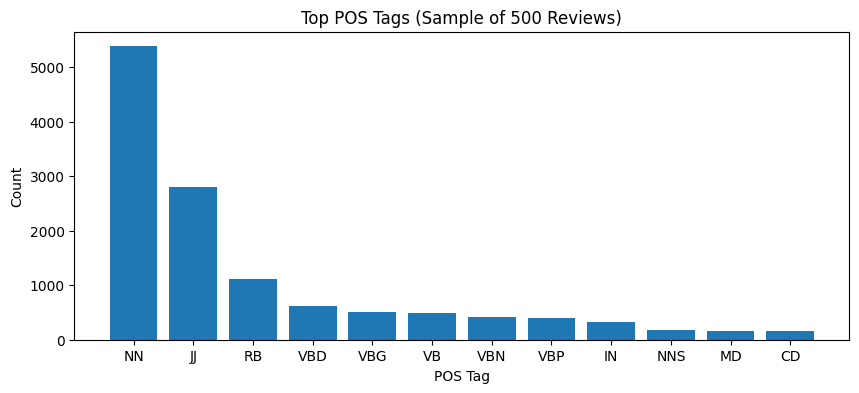

In [18]:
from nltk import pos_tag
from collections import Counter
import matplotlib.pyplot as plt

# Example POS tagging for one review
sample_tokens = df["tokens_lemma"].iloc[0]
print("Sample tokens:", sample_tokens[:25])
print("POS tags:", pos_tag(sample_tokens[:25]))

subset_tokens = df["tokens_lemma"].head(500).tolist()
all_tags = []
for toks in subset_tokens:
    all_tags.extend([tag for _, tag in pos_tag(toks)])

tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(12)

labels = [x[0] for x in top_tags]
values = [x[1] for x in top_tags]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top POS Tags (Sample of 500 Reviews)")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()

# **Task 5 - Sentiment Modelling and Prediction**
---
In this task, sentiment is modelled from two perspectives:

1) **Text-based sentiment (BERT)**: Apply a pretrained transformer sentiment model directly to review text to produce an independent sentiment signal.


2) **Rating-based sentiment (supervised ML)**: Train classifiers using polarity labels derived from star ratings  
   - 1-2 = Negative, 3 = Neutral, 4-5 = Positive  
   - Models: Logistic Regression, SVM, Multinomial Naïve Bayes  
   - Features: TF-IDF (with n-grams)


The outputs from both approaches will be used in the next task to measure agreement/disagreement and build a reliability score.


**1. BERT sentiment (3-class)**

The pre-trained BERT-family transformer sentiment model was applied directly to the cleaned reviews text to predict sentiment classes (negative, neutral, positive).

In [19]:
from transformers import pipeline
import torch
from tqdm.auto import tqdm

device = 0 if torch.cuda.is_available() else -1

sent_pipe = pipeline(
    "sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest", device=device
)

texts = df_cleaned["reviews"].fillna("").astype(str).tolist()

results = []
batch_size = 64
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    results.extend(sent_pipe(batch, truncation=True, max_length=256))

label_map = {
    "positive": "positive",
    "neutral": "neutral",
    "negative": "negative"
}

df_cleaned["bert_sentiment_3"] = [label_map.get(r["label"].lower(), r["label"].lower()) for r in results]
df_cleaned["bert_score"] = [r["score"] for r in results]

df_cleaned[["bert_sentiment_3","bert_score"]].head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


  0%|          | 0/176 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,bert_sentiment_3,bert_score
0,neutral,0.785322
1,neutral,0.513807
2,neutral,0.663537
3,neutral,0.735903
4,positive,0.932931


Ploting the BERT Text Sentiment Labels counts

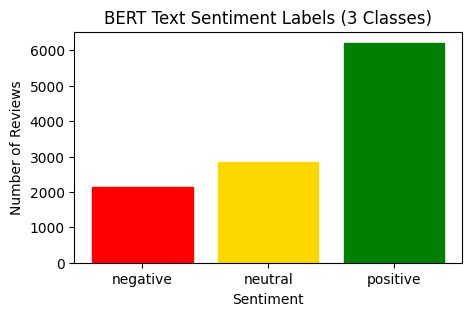

In [20]:
import matplotlib.pyplot as plt
counts = df_cleaned["bert_sentiment_3"].value_counts()
order = ["negative", "neutral", "positive"]
counts = counts.reindex(order)
plt.figure(figsize=(5,3))
plt.bar(counts.index, counts.values)
colors = ["red", "gold", "green"]
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(colors[i])
plt.title("BERT Text Sentiment Labels (3 Classes)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

**Create Rating-based labels (3-class)**

In [21]:
import numpy as np
RATING_COL = "rating" if "rating" in df_cleaned.columns else "star_rating"
def map_rating_to_polarity(r):
    if r in [1, 2]:
        return "negative"
    elif r == 3:
        return "neutral"
    elif r in [4, 5]:
        return "positive"
    return np.nan

df_cleaned["rating_polarity_3"] = df_cleaned[RATING_COL].apply(map_rating_to_polarity)
df_cleaned = df_cleaned.dropna(subset=["rating_polarity_3"]).copy()
df_cleaned["rating_polarity_3"].value_counts()

,count
rating_polarity_3,
positive,7649
negative,2686
neutral,872


**Train/test split + TF-IDF**


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_cleaned["reviews"].astype(str)
y = df_cleaned["rating_polarity_3"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

tfidf = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((8965, 23432), (2242, 23432))

## Training Rating-Based Machine Learning Models

In this step, three supervised machine learning classifiers — Logistic Regression, Support Vector Machine, and Multinomial Naïve Bayes — are trained using TF-IDF features and rating-derived sentiment labels.  
These models represent sentiment inferred from star ratings and provide a basis for comparison with the text-based BERT sentiment predictions.


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

lr = LogisticRegression(max_iter=2000, class_weight="balanced")
svm = LinearSVC(class_weight="balanced")
mnb = MultinomialNB()

lr.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)
mnb.fit(X_train_tfidf, y_train)

pred_lr  = lr.predict(X_test_tfidf)
pred_svm = svm.predict(X_test_tfidf)
pred_mnb = mnb.predict(X_test_tfidf)


# **Task 6 - Model Evaluation and Inferences**
---
The performance of the rating-based classifiers is evaluated using standard classification metrics including precision, recall, and F1-score.  
This evaluation measures how well each model learns sentiment patterns derived from star ratings and highlights differences in their predictive behaviour.


In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

models = {
    "Logistic Regression": pred_lr,
    "Support Vector Machine": pred_svm,
    "Naive Bayes": pred_mnb
}

rows = []

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, preds, average="weighted"
    )

    rows.append({
        "Model": name,
        "Accuracy": round(acc, 6),
        "Precision": round(precision, 6),
        "Recall": round(recall, 6),
        "F1 Score": round(f1, 6)
    })

eval_df = pd.DataFrame(rows).sort_values(by="Accuracy", ascending=False)
eval_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
1,Support Vector Machine,0.834523,0.821078,0.834523,0.826875
0,Logistic Regression,0.803747,0.828224,0.803747,0.814201
2,Naive Bayes,0.755129,0.735685,0.755129,0.691081


In [25]:
X_all_tfidf = tfidf.transform(df_cleaned["reviews"].astype(str))

df_cleaned["pred_lr"]  = lr.predict(X_all_tfidf)
df_cleaned["pred_svm"] = svm.predict(X_all_tfidf)
df_cleaned["pred_mnb"] = mnb.predict(X_all_tfidf)

df_cleaned[["rating_polarity_3","bert_sentiment_3","pred_lr","pred_svm","pred_mnb"]].head()


,rating_polarity_3,bert_sentiment_3,pred_lr,pred_svm,pred_mnb
0,positive,neutral,positive,positive,positive
1,neutral,neutral,neutral,neutral,positive
2,neutral,neutral,neutral,neutral,positive
3,positive,neutral,positive,positive,positive
4,positive,positive,positive,positive,positive


## Agreement Analysis - Creating Comparison Flags

In this step, logical comparison flags are created to measure how often the different sentiment models agree or disagree.  
The flags indicate:

- Whether all rating-based models (LR, SVM, MNB) predict the same sentiment.
- Whether BERT sentiment agrees with the rating-derived label.
- Whether BERT agrees simultaneously with all rating-based models.

These indicators form the foundation for constructing agreement groups and the final sentiment reliability levels.


In [26]:
# Rating models agreement (LR, SVM, MNB)
df_cleaned["ml_all_agree"] = (
    (df_cleaned["pred_lr"] == df_cleaned["pred_svm"]) &
    (df_cleaned["pred_svm"] == df_cleaned["pred_mnb"])
)

# BERT agrees with rating-derived label
df_cleaned["bert_vs_rating"] = (df_cleaned["bert_sentiment_3"] == df_cleaned["rating_polarity_3"])

# BERT agrees with ALL ML models (strongest agreement)
df_cleaned["bert_vs_ml_all"] = (
    df_cleaned["ml_all_agree"] &
    (df_cleaned["bert_sentiment_3"] == df_cleaned["pred_lr"])
)

df_cleaned[["ml_all_agree","bert_vs_rating","bert_vs_ml_all"]].head()


,ml_all_agree,bert_vs_rating,bert_vs_ml_all
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,True,True,True


## Agreement Summary Statistics

This table summarises the level of agreement between the different sentiment signals.  
It reports how often:

- All rating-based models agree with each other.
- BERT sentiment matches the rating-derived sentiment.
- BERT sentiment agrees with all rating-based models simultaneously.

These summary statistics provide a quantitative overview of alignment between star ratings and textual sentiment.


In [27]:
summary = pd.DataFrame({
    "Metric": [
        "ML models all agree (LR=SVM=MNB)",
        "BERT agrees with rating label",
        "BERT agrees with all ML models"
    ],
    "Count": [
        df_cleaned["ml_all_agree"].sum(),
        df_cleaned["bert_vs_rating"].sum(),
        df_cleaned["bert_vs_ml_all"].sum()
    ],
    "Percent": [
        round(df_cleaned["ml_all_agree"].mean()*100, 2),
        round(df_cleaned["bert_vs_rating"].mean()*100, 2),
        round(df_cleaned["bert_vs_ml_all"].mean()*100, 2)
    ]
})

summary


,Metric,Count,Percent
0,ML models all agree (LR=SVM=MNB),8210,73.26
1,BERT agrees with rating label,7541,67.29
2,BERT agrees with all ML models,6302,56.23


## Agreement Group Construction

Based on the agreement flags, each review is assigned to one of four agreement groups.  
These groups represent different patterns of alignment and disagreement between BERT sentiment and rating-based machine learning models, enabling structured analysis of sentiment consistency.


In [28]:
def agreement_category(row):
    ml_agree = row["ml_all_agree"]
    bert_eq_ml = (row["bert_sentiment_3"] == row["pred_lr"]) if ml_agree else False

    if ml_agree and bert_eq_ml:
        return "All agree (BERT + ML)"
    elif ml_agree and not bert_eq_ml:
        return "ML agree, BERT differs"
    elif (not ml_agree) and row["bert_vs_rating"]:
        return "ML disagree, BERT matches rating"
    else:
        return "Mixed/low agreement"

df_cleaned["agreement_group"] = df_cleaned.apply(agreement_category, axis=1)

df_cleaned["agreement_group"].value_counts()


,count
agreement_group,
All agree (BERT + ML),6302
"ML agree, BERT differs",1908
Mixed/low agreement,1735
"ML disagree, BERT matches rating",1262


## Sentiment Reliability Indicator

The agreement groups are mapped into qualitative reliability levels: Very High, High, Medium, and Low.  
This reliability indicator reflects the confidence of the sentiment interpretation for each review and will be used to support decision-making and recommendations.


In [29]:
reliability_map = {
    "All agree (BERT + ML)": "Very High",
    "ML agree, BERT differs": "High",
    "ML disagree, BERT matches rating": "Medium",
    "Mixed/low agreement": "Low"
}

df_cleaned["reliability_level"] = df_cleaned["agreement_group"].map(reliability_map)

df_cleaned["reliability_level"].value_counts(normalize=True).round(3)


,proportion
reliability_level,
Very High,0.562
High,0.170
Low,0.155
Medium,0.113


## Qualitative Analysis of Disagreement Cases

This step extracts representative reviews from mismatch categories, particularly where rating-based models agree but BERT differs.  
These cases are manually inspected to identify linguistic patterns such as contrastive expressions, mixed opinions, or implicit sentiment that explain why the sentiment signals diverge.


In [30]:
# Cases where rating-based models agree but BERT disagrees
mismatch_cases = df_cleaned[df_cleaned["agreement_group"] == "ML agree, BERT differs"].copy()

mismatch_cases[[
    "reviews",
    "rating_polarity_3",
    "bert_sentiment_3",
    "pred_lr","pred_svm","pred_mnb",
    "bert_score"
]].head(10)


,reviews,rating_polarity_3,bert_sentiment_3,pred_lr,pred_svm,pred_mnb,bert_score
0,works use car windows fog work glasses well,positive,neutral,positive,positive,positive,0.785322
3,expected advertised,positive,neutral,positive,positive,positive,0.735903
11,side effects videoid b ea fc fbd e f personall...,positive,negative,positive,positive,positive,0.771173
14,finally help sore ears supposed holds mask pla...,positive,neutral,positive,positive,positive,0.465296
20,works right got one temporary sunglasses eye d...,positive,neutral,positive,positive,positive,0.476305
24,placebo influences found,negative,neutral,positive,positive,positive,0.865605
25,recommended ophthalmologist use eye doctors of...,positive,neutral,positive,positive,positive,0.537582
26,meh definitely get month use kitchlife reusabl...,positive,neutral,positive,positive,positive,0.693321
41,soft comfortable looks like kids diapers adult...,positive,neutral,positive,positive,positive,0.594429
42,trust wellements brand used wellements baby st...,positive,negative,positive,positive,positive,0.615398


# **Extra Challenge - High-Confidence Polarity Gap Detection**
---
This additional analysis identifies reviews where the **text-based BERT model expresses strong sentiment confidence** that contradicts the star-rating polarity and all rating-based machine learning models.

A review is flagged as a *High-Confidence Polarity Gap* case when:
- BERT confidence score ≥ 0.90  
- BERT sentiment ≠ rating-derived polarity  
- Logistic Regression, SVM, and Naïve Bayes all agree with the rating polarity

These cases represent situations where customers clearly express emotional opinions in text that are not reflected by their numeric star ratings, highlighting potential weaknesses in star-based customer feedback interpretation.


In [31]:
gap_cases = df_cleaned[
    (df_cleaned["bert_score"] >= 0.90) &
    (df_cleaned["bert_sentiment_3"] != df_cleaned["rating_polarity_3"]) &
    (df_cleaned["ml_all_agree"])
]

len(gap_cases), round(len(gap_cases)/len(df_cleaned)*100, 2)


(36, 0.32)

In [33]:
gap_cases[[
    "reviews",
    "rating_polarity_3",
    "bert_sentiment_3",
    "bert_score",
    "pred_lr","pred_svm","pred_mnb"
]].head(len(gap_cases))


,reviews,rating_polarity_3,bert_sentiment_3,bert_score,pred_lr,pred_svm,pred_mnb
531,kids like backup grands occasionally run like,positive,neutral,0.908972,positive,positive,positive
800,smells great feel awake lasts duration shower ...,neutral,positive,0.976781,positive,positive,positive
1519,good muffins good,negative,positive,0.929519,positive,positive,positive
1659,hard tell actually works great flavor kids acc...,neutral,positive,0.941276,positive,positive,positive
1841,absolutely buy cheap cheap cheap cheap thankfu...,negative,positive,0.908237,negative,negative,negative
2407,ingredients blood sugar levels,positive,neutral,0.904631,positive,positive,positive
2521,great item great product high high price,neutral,positive,0.971751,positive,positive,positive
2766,rose scent super excited find bundle rose incl...,neutral,positive,0.983914,positive,positive,positive
2979,happy product product well secure well knee bi...,negative,positive,0.951825,positive,positive,positive
3043,got big butt stool great wheeling around kitch...,neutral,positive,0.901133,positive,positive,positive
